In [5]:
using BSON: @save, @load
using MDToolbox, Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


In [3]:
@load "afm_generate_test_data.bson" afms models models_template qs myseed sigma_noise nframe

In [61]:
#anim = @animate for afm = afms[1:100]
#    heatmap(afm)
#end

#gif(anim, "afm_independent_data.gif", fps = 10)

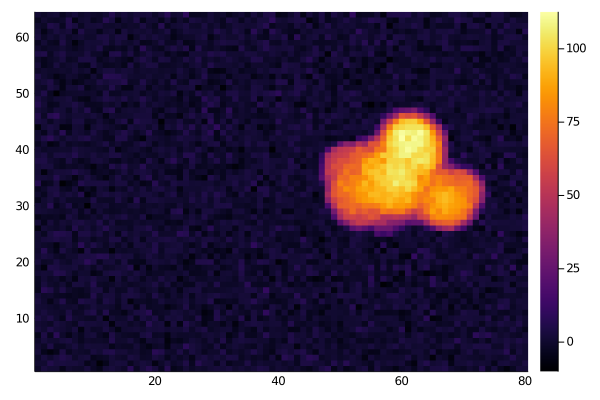

In [65]:
heatmap(afms[50])

In [8]:
@load "afm_analyze_test_data_parallel.bson" r configs

In [32]:
afms_best = []
for iframe = 1:nframe
    push!(afms_best, r[iframe][5])
end

In [63]:
#anim = @animate for iframe = 1:100
#    heatmap(afms_best[iframe])
#end

#gif(anim, "afm_independent_data2.gif", fps = 10)
#heatmap(afms[100])
#heatmap(afms_best[100])

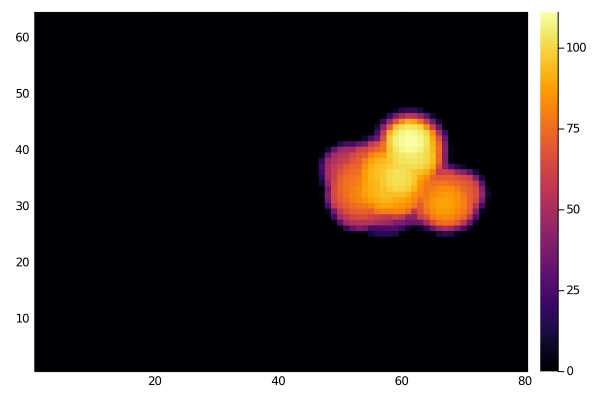

In [47]:
heatmap(afms_best[50])

In [28]:
rmsd_mean = 0.0
count = 0
for i = 1:50
    for j = (i+1):50
        ta1 = models_template[i]
        ta2 = models_template[j]
        ta2 = superimpose(ta1, ta2)
        g = compute_rmsd(ta1, ta2)
        rmsd_mean += g[1]
        count += 1
    end
end
rmsd_mean = rmsd_mean / count

9.851149807402535

In [29]:
rmsd = zeros(Float64, nframe)
for i = 1:nframe
    model_ref = models[i]
    model_es = models_template[r[i][1]]
    model_es = superimpose(model_ref, model_es)
    g = compute_rmsd(model_ref, model_es)
    rmsd[i] = g[1]
end

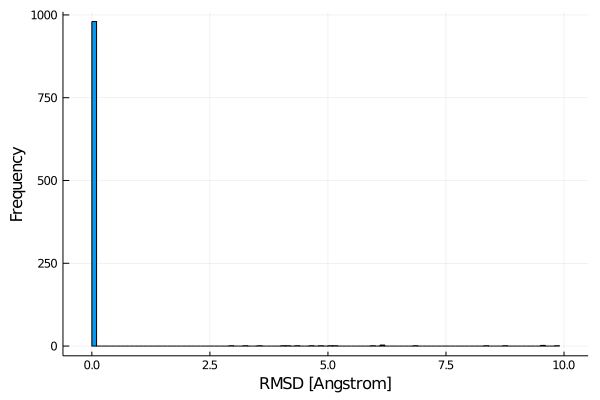

In [64]:
#?histogram
histogram(rmsd, bins=100, xlabel="RMSD [Angstrom]", ylabel="Frequency", legend=:false)

In [31]:
sum(rmsd .< 0.0001)

980

In [23]:
rmsd = zeros(Float64, nframe)
for i = 1:nframe
    model_ref = models[i]
    model_es = models_template[r[i][1]]
    #model_es = superimpose(model_ref, model_es)
    g = compute_rmsd(model_ref, model_es)
    rmsd[i] = g[1]
end

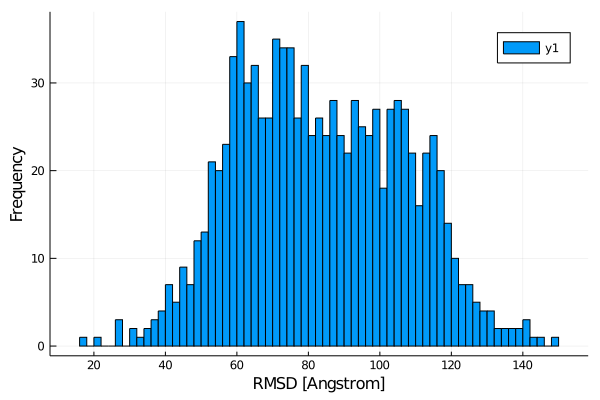

In [24]:
#?histogram
histogram(rmsd, bins=100, xlabel="RMSD [Angstrom]", ylabel="Frequency")

In [53]:
probe_radius = zeros(Float64, nframe)
for iframe = 1:nframe
    probe_radius[iframe] = r[iframe][3].probeRadius
end

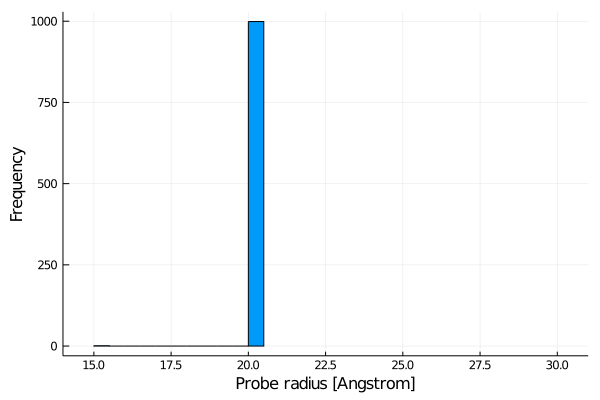

In [59]:
histogram(probe_radius, xlim=(14, 31), bins=20, xlabel="Probe radius [Angstrom]", ylabel="Frequency", legend=:false)

In [60]:
sum(abs.(probe_radius .- 20.0) .< 0.001)

999